In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd

In [2]:
job = pd.read_csv("/Users/USER/Desktop/For-Python/StudentJob.csv",encoding = "big5")
job.head()

,code,type,salary,working
0,1401,綜合教育學類,37423,0.84
1,1402,普通科目教育學類,34327,0.85
2,1403,專業科目教育學類,34619,0.85
3,1404,學前教育學類,32645,0.91
4,1405,成人教育學類,30753,0.86


In [3]:
job[['salary']] = job[['salary']].astype(float)
job[['working']] = job[['working']].astype(float)
mat = job[['salary','working']].values
mat

array([[3.7423e+04, 8.4000e-01],
       [3.4327e+04, 8.5000e-01],
       [3.4619e+04, 8.5000e-01],
       [3.2645e+04, 9.1000e-01],
       [3.0753e+04, 8.6000e-01],
       [4.4859e+04, 9.3000e-01],
       [3.1545e+04, 8.1000e-01],
       [2.8474e+04, 8.9000e-01],
       [3.7638e+04, 8.9000e-01],
       [2.9377e+04, 7.6000e-01],
       [3.3485e+04, 5.4000e-01],
       [2.4842e+04, 8.7000e-01],
       [3.1875e+04, 6.6000e-01],
       [3.0066e+04, 7.7000e-01],
       [2.9914e+04, 8.0000e-01],
       [2.9871e+04, 7.8000e-01],
       [2.8217e+04, 5.8000e-01],
       [3.0450e+04, 7.7000e-01],
       [2.7005e+04, 7.0000e-01],
       [2.8427e+04, 8.5000e-01],
       [3.1029e+04, 8.3000e-01],
       [3.0313e+04, 8.5000e-01],
       [3.5684e+04, 8.9000e-01],
       [3.0426e+04, 8.9000e-01],
       [2.8770e+04, 8.5000e-01],
       [2.7366e+04, 7.4000e-01],
       [3.0347e+04, 7.6000e-01],
       [3.0988e+04, 8.6000e-01],
       [3.0394e+04, 7.9000e-01],
       [3.3020e+04, 8.4000e-01],
       [2.

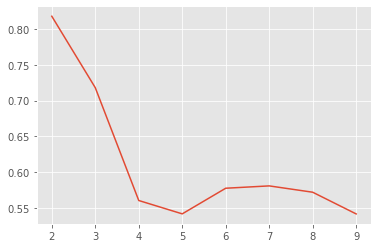

[0.8175082212459814, 0.7178861045528213, 0.5605931317389315, 0.541967949146904, 0.5777028829579288, 0.580967798226166, 0.5721407566300195, 0.5418927381137643]


In [9]:
# choose the best k by silhouette method
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
avgs = []
for k in range(2,10):
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(mat)
    cluster_labels = kmeans_fit.labels_
    avg = metrics.silhouette_score(mat, cluster_labels)
    avgs.append(avg)

# plot k=2 to 10 
plt.plot(range(2,10), avgs)
plt.show()
print(avgs)

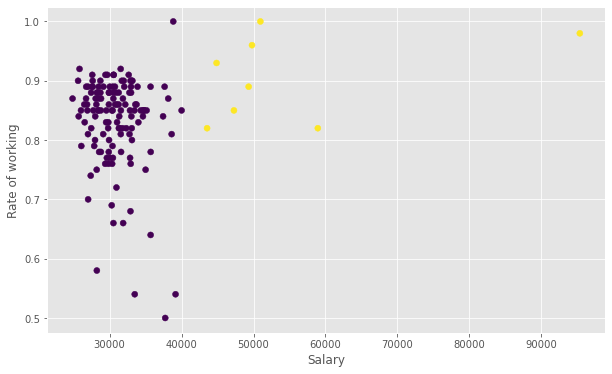

array([[3.08339701e+04, 8.31492537e-01],
       [5.50037500e+04, 9.06250000e-01]])

In [13]:
# k=2 is the best classification
bestkm = cluster.KMeans(n_clusters = 2).fit(mat)
pred = bestkm.fit_predict(mat)
plt.figure(figsize=(10, 6))
plt.xlabel('Salary')
plt.ylabel('Rate of working')
plt.scatter(mat[:, 0], mat[:, 1], c=pred) 
plt.show()
# center of each cluster
bestkm.cluster_centers_ 